# Estimating Reaction Kinetics in Industrial Plants Using Physics-Informed Neural Networks (PINNs) #

![PINN Diagram](https://www.researchgate.net/profile/Zhen-Li-105/publication/335990167/figure/fig1/AS:806502679982080@1569296631121/Schematic-of-a-physics-informed-neural-network-PINN-where-the-loss-function-of-PINN.ppm)


## Abstract

Typical industrial plants with reaction units use proprietary technology provided by licensors. These licensors offer their technology packages, which include specialized catalysts, processes, and kinetic models, encapsulated within a "black box."  However, this proprietary technology is treated as a trade secret, and the details of the catalysts' behavior and the precise kinetic models are not disclosed, even to the plant operators who use the technology. 

This "black box" creates several problems for the users. Since they lack access to the detailed kinetic models and catalyst behavior, they are unable to independently perform critical activities such as process optimization, troubleshooting, or adapting the process to different feedstocks. Instead, they must rely entirely on the licensor for support, which can be time-consuming and inefficient, especially when fast optimizations are required.

Fortunately, users do have access to operational data. With the advancement of machine learning techniques, there is an opportunity to use this data to infer the hidden aspects of the reaction kinetics and catalyst behavior hidden in the black box. One promising machine learning approach for this purpose is the Physics-Informed Neural Network (PINN). PINNs integrate the governing physical laws, such as differential equations that describe mass and energy balances, directly into the neural network's architecture. This hybrid model combines the robustness of data-driven machine learning with the accuracy of physics-based modeling, allowing the network to learn the underlying kinetics and catalyst behavior in a way that is consistent with the physical constraints of the system. 

By training a PINN on the available plant data, users can potentially "unlock" the black box, generating a model that captures the essential features of the process kinetics and catalyst performance. This enables them to perform optimizations, simulations, and troubleshooting activities independently, significantly enhancing their operational efficiency and flexibility.



## Objective:

The objective of this study is to develop a Physics-Informed Neural Network (PINN) model to estimate the reaction kinetics of the hydrodesulfurization (HDS) process for a waxy distillate feedstock. 

## Methodology:

1. **Develop the Stoichiometry of the Reaction:**
   First, we will establish the stoichiometry for the hydrodesulfurization (HDS) of a waxy distillate. This involves determining the chemical reactions that represent the conversion of sulfur-containing compounds in the distillate into desulfurized hydrocarbons and hydrogen sulfide (H₂S). By defining this stoichiometry, we can set the foundation for understanding the material balance and the relationships between the reactants and products.

2. **Develop the Reaction Kinetics and the PDE:**
   Using the established stoichiometry, we will formulate the reaction kinetics, which describe how the concentration of each reactant and product changes over time. These kinetics will be used to derive a set of partial differential equations (PDEs) that govern the reaction dynamics within the reactor. The PDEs will incorporate both the reaction rates and the transport phenomena, such as diffusion and convection.

3. **Generate Synthetic Data:**
   To train our PINN model, we will generate synthetic data based on the developed reaction kinetics and PDEs. This data will simulate the concentration profiles of different species over time under various conditions, such as temperature and pressure. This synthetic dataset will serve as a substitute for real plant data and will be used to train and validate the PINN model.

4. **Develop Baseline PINN Model:**
   We will create a baseline Physics-Informed Neural Network model that integrates the physical constraints from the PDEs with the neural network’s data-driven capabilities. This model will be designed to take the synthetic data as input and learn the underlying reaction kinetics and dynamics.

5. **Train the Model:**
   The baseline PINN model will be trained using the synthetic data. During this process, the model will optimize its parameters to minimize the loss function, which includes both data loss (the difference between predicted and actual concentrations) and physics loss (the residuals of the PDEs).

6. **Validate the Model:**
   Finally, we will validate the trained PINN model against a separate set of synthetic data or experimental data, if available. This step will ensure that the model accurately captures the reaction kinetics and can be used for predictive purposes, such as optimizing the reaction conditions or understanding the behavior of the process under different scenarios.

### Step 1: Stoichiometry of Waxy Distillate in Hydrodesulfurization (HDS):

Waxy distillate is a fraction obtained from the distillation of crude oil, typically containing long-chain paraffins and naphthenes along with various sulfur compounds. It is characterized by its high wax content and can solidify at lower temperatures due to the presence of long-chain hydrocarbons. The primary purpose of hydrodesulfurization (HDS) for waxy distillate is to remove sulfur impurities to meet environmental regulations and improve the quality of the fuel.

#### General Stoichiometric Reaction for Hydrodesulfurization:
In HDS, sulfur compounds in the waxy distillate react with hydrogen to form hydrogen sulfide (H₂S) and the desulfurized hydrocarbon product.

**Generalized Reaction:**
$
\text{R-S-R'} + \text{H}_2 \rightarrow \text{R-H} + \text{R'-H} + \text{H}_2\text{S}
$

- **R-S-R'**: Represents the sulfur-containing hydrocarbon, where R and R' are long-chain alkyl groups.
- **H₂**: Hydrogen gas used in the reaction.
- **R-H and R'-H**: Desulfurized hydrocarbon products.
- **H₂S**: Hydrogen sulfide, the by-product of sulfur removal.

**Example Reaction for a Simplified Compound:**
If we take a hypothetical long-chain paraffinic sulfur compound, such as C₃₀H₆₁SH, the reaction can be represented as:

$
\text{C}_{30}\text{H}_{61}\text{SH} + \text{H}_2 \rightarrow \text{C}_{30}\text{H}_{62} + \text{H}_2\text{S}
$

### Waxy Distillate Composition:

**Waxy Distillate Composition:**
- **Long-Chain Hydrocarbons:** Waxy distillates are rich in long-chain paraffins (alkanes) which contribute to the waxy nature of the distillate. These compounds can have a high melting point and tend to solidify at lower temperatures, making the fuel prone to gelling in cold environments.
- **Sulfur Compounds:** Waxy distillate may contain a variety of sulfur compounds, such as mercaptans, sulfides, and thiophenes. These sulfur species are undesirable due to their environmental impact and corrosive properties.


In [1]:
!pip install pandas sympy

In [2]:
#let's establish the reaction stoichiometry in python
import pandas as pd
from sympy import symbols, Eq

# Define the stoichiometry in a dictionary
stoichiometry = {
    "Reactants": {
        "C30H61SH": 1,  # 1 mole of C30H61SH
        "H2": 1         # 1 mole of H2
    },
    "Products": {
        "C30H62": 1,    # 1 mole of C30H62
        "H2S": 1        # 1 mole of H2S
    }
}

# Display the stoichiometry using pandas
stoichiometry_df = pd.DataFrame(stoichiometry)
print("Stoichiometry of the Hydrodesulfurization Reaction:")
print(stoichiometry_df)


Stoichiometry of the Hydrodesulfurization Reaction:
          Reactants  Products
C30H61SH        1.0       NaN
H2              1.0       NaN
C30H62          NaN       1.0
H2S             NaN       1.0


In [3]:
from sympy import symbols, Eq

# Define symbols for reactants and products
C30H61SH, H2, C30H62, H2S = symbols('C30H61SH H2 C30H62 H2S')

# Define the stoichiometric equation
stoichiometric_equation = Eq(C30H61SH + H2, C30H62 + H2S)

# Display the symbolic equation
stoichiometric_equation


Eq(C30H61SH + H2, C30H62 + H2S)

### Step 2: Develop the Reaction Kinetics and the PDE

1. **Define the Reaction Kinetics:**
For the hydrodesulfurization (HDS) process, we'll focus on a simplified reaction where a sulfur-containing compound (e.g., C₃₀H₆₁SH) reacts with hydrogen to produce desulfurized hydrocarbon (C₃₀H₆₂) and hydrogen sulfide (H₂S).

**Simplified Reaction:**
$$
\text{C}_{30}\text{H}_{61}\text{SH} + \text{H}_2 \rightarrow \text{C}_{30}\text{H}_{62} + \text{H}_2\text{S}
$$

**General Kinetic Rate Law:**
The rate of reaction can generally be expressed as:
$$
r = k \cdot [\text{C}_{30}\text{H}_{61}\text{SH}]^m \cdot [\text{H}_2]^n
$$
Where:
- $ r $ = rate of reaction (mol/L/s)
- $ k $ = reaction rate constant (depends on temperature according to Arrhenius equation)
- $ [\text{C}_{30}\text{H}_{61}\text{SH}] $ = concentration of the sulfur-containing compound (mol/L)
- $ [\text{H}_2] $ = concentration of hydrogen gas (mol/L)
- $ m $ and $ n $ = reaction orders with respect to sulfur compound and hydrogen, respectively.

Assuming first-order reaction kinetics for both reactants (i.e., $ m = 1 $ and $ n = 1 $):
$
r = k \cdot [\text{C}_{30}\text{H}_{61}\text{SH}] \cdot [\text{H}_2]
$

2. **Developing the Reaction Kinetics:**
**Arrhenius Equation for the Rate Constant:**
The rate constant $ k $ varies with temperature and is given by the Arrhenius equation:
$
k = A \cdot e^{-\frac{E_a}{RT}}
$
Where:
- $ A $ = pre-exponential factor (frequency factor)
- $ E_a $ = activation energy (J/mol)
- $ R $ = universal gas constant (8.314 J/mol·K)
- $ T $ = absolute temperature (K)

3. **Establishing the PDE for a Plug Flow Reactor (PFR):**
In a PFR, the change in concentration of reactants and products along the length of the reactor is governed by a set of PDEs.

**Mass Balance for Sulfur Compound (C₃₀H₆₁SH):**
$
\frac{\partial C_s}{\partial t} + u \frac{\partial C_s}{\partial x} = -r
$
Where:
- $C_s $ = concentration of sulfur compound, C₃₀H₆₁SH (mol/L)
- $ u $ = flow velocity (m/s)
- $ r $ = rate of reaction (mol/L/s)
- $ x $ = position along the reactor length (m)
- $ t $ = time (s)

**Mass Balance for Hydrogen (H₂):**
$
\frac{\partial C_{\text{H}_2}}{\partial t} + u \frac{\partial C_{\text{H}_2}}{\partial x} = -r
$

**Mass Balance for Product Hydrocarbon (C₃₀H₆₂):**
$
\frac{\partial C_{\text{C}_{30}\text{H}_{62}}}{\partial t} + u \frac{\partial C_{\text{C}_{30}\text{H}_{62}}}{\partial x} = r
$

**Mass Balance for Hydrogen Sulfide (H₂S):**
$
\frac{\partial C_{\text{H}_2\text{S}}}{\partial t} + u \frac{\partial C_{\text{H}_2\text{S}}}{\partial x} = r
$





In [4]:
import numpy as np

# first, let us set up the Arrhenius equation. This can be used to calculate the rate constant
A = 1e7  # Pre-exponential factor (arbitrary value) - can be set as constant for ease of implementation
Ea = 50000  # Activation energy (J/mol) - set as initial value first, then will be updated based on PINN
R = 8.314  # Universal gas constant (J/mol·K)
T = 660  # Temperature (K) - 389 degC
u = 1.0  # Flow velocity (m/s)

# the arrhenius equation can be defines as below
k = A * np.exp(-Ea / (R * T))

# set the initial concentration (mol/L) - this number is set up based on the stoichiometry. Two hydrogen are required for each sulfur
C_s_initial = 10  # Sulfur compound
C_H2_initial = 20  # Hydrogen
C_H2S_initial = 0.0  # Hydrogen sulfide (product)
C_product_initial = 0.0  # Desulfurized hydrocarbon

#set up the reaction rate function
def reaction_rate(C_s, C_H2):
    """
    This funtions takes in the initial concentration of
    species in the reaction and perform reaction rate calculation.
    The reaction rate, k has been defined as above.
    
    """
    return k * C_s * C_H2

# PDE function for numerical solution (simplified)
def pde_system(t, concentrations):
    """
    This functions describe the differential equations use to resolve this initial reaction rate.
    We can use this DE to find the concentrations of selected species over time.

    """
    
    C_s, C_H2, C_product, C_H2S = concentrations
    r = reaction_rate(C_s, C_H2)
    dC_s_dt = -r
    dC_H2_dt = -r
    dC_product_dt = r
    dC_H2S_dt = r
    return [dC_s_dt, dC_H2_dt, dC_product_dt, dC_H2S_dt]


In the step above, we just initialize everything about our reaction rate and our PDE. For demonstration, we can use partial differential equations solver to demonstrate the change in this concentration over time

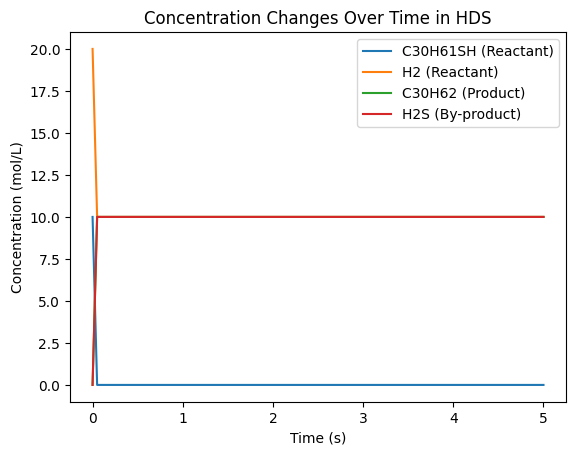

In [5]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Initial conditions for the concentrations
initial_conditions = [C_s_initial, C_H2_initial, C_product_initial, C_H2S_initial]
t_span = (0, 5)  # Time span for the simulation

# Solve the PDEs using solve_ivp
solution = solve_ivp(pde_system, t_span, initial_conditions, method='RK45', t_eval=np.linspace(0, 5, 100))

# Plot results
plt.plot(solution.t, solution.y[0], label='C30H61SH (Reactant)')
plt.plot(solution.t, solution.y[1], label='H2 (Reactant)')
plt.plot(solution.t, solution.y[2], label='C30H62 (Product)')
plt.plot(solution.t, solution.y[3], label='H2S (By-product)')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mol/L)')
plt.title('Concentration Changes Over Time in HDS')
plt.legend()
plt.show()


In [6]:
import pandas as pd

df = pd.read_csv('concentration.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T1      100 non-null    float64
 1   T2      100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [7]:
import numpy as np
import pandas as pd

# Molecular weights (g/mol)
MW_sulfur = 32  # g/mol for sulfur
MW_thiol = 421  # g/mol for C₃₀H₆₁SH
MW_hydrogen = 2  # g/mol for H₂
MW_h2s = 34  # g/mol for H₂S

# Total mass is assumed to be 100 g (since it's wt%)
total_mass = 100  # g


# Convert sulfur wt% to mass in grams
df['sulfur_mass_before'] = (df['T1'] / 100) * total_mass
df['sulfur_mass_after'] = (df['T2'] / 100) * total_mass

# Calculate thiol and hydrogen masses using stoichiometry
df['thiol_mass_before'] = (df['sulfur_mass_before'] / MW_sulfur) * MW_thiol
df['thiol_mass_after'] = (df['sulfur_mass_after'] / MW_sulfur) * MW_thiol

df['hydrogen_mass_before'] = (df['sulfur_mass_before'] / MW_sulfur) * MW_hydrogen
df['hydrogen_mass_after'] = (df['sulfur_mass_after'] / MW_sulfur) * MW_hydrogen

# Calculate H₂S mass based on sulfur consumption
df['h2s_mass'] = (df['sulfur_mass_before'] - df['sulfur_mass_after']) / MW_sulfur * MW_h2s

# Convert back to wt% for thiol, hydrogen, and H₂S
df['thiol_wt%_before'] = (df['thiol_mass_before'] / total_mass) * 100
df['thiol_wt%_after'] = (df['thiol_mass_after'] / total_mass) * 100

df['hydrogen_wt%_before'] = (df['hydrogen_mass_before'] / total_mass) * 100
df['hydrogen_wt%_after'] = (df['hydrogen_mass_after'] / total_mass) * 100

df['h2s_wt%'] = (df['h2s_mass'] / total_mass) * 100

# Display the updated DataFrame
df



,T1,T2,sulfur_mass_before,sulfur_mass_after,thiol_mass_before,thiol_mass_after,hydrogen_mass_before,hydrogen_mass_after,h2s_mass,thiol_wt%_before,thiol_wt%_after,hydrogen_wt%_before,hydrogen_wt%_after,h2s_wt%
0,0.060396,0.000146,0.060396,0.000146,0.794589,0.001920,0.003775,0.000009,0.064016,0.794589,0.001920,0.003775,0.000009,0.064016
1,0.063786,0.000060,0.063786,0.000060,0.839185,0.000789,0.003987,0.000004,0.067709,0.839185,0.000789,0.003987,0.000004,0.067709
2,0.062366,0.000197,0.062366,0.000197,0.820505,0.002590,0.003898,0.000012,0.066055,0.820505,0.002590,0.003898,0.000012,0.066055
3,0.065536,0.000138,0.065536,0.000138,0.862207,0.001814,0.004096,0.000009,0.069485,0.862207,0.001814,0.004096,0.000009,0.069485
4,0.063009,0.000082,0.063009,0.000082,0.828965,0.001085,0.003938,0.000005,0.066860,0.828965,0.001085,0.003938,0.000005,0.066860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.092855,0.001819,0.092855,0.001819,1.221622,0.023927,0.005803,0.000114,0.096726,1.221622,0.023927,0.005803,0.000114,0.096726
96,0.081355,0.001499,0.081355,0.001499,1.070332,0.019717,0.005085,0.000094,0.084848,1.070332,0.019717,0.005085,0.000094,0.084848
97,0.070722,0.001028,0.070722,0.001028,0.930430,0.013525,0.004420,0.000064,0.074049,0.930430,0.013525,0.004420,0.000064,0.074049
98,0.059330,0.000457,0.059330,0.000457,0.780558,0.006016,0.003708,0.000029,0.062552,0.780558,0.006016,0.003708,0.000029,0.062552


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   T1                    100 non-null    float64
 1   T2                    100 non-null    float64
 2   sulfur_mass_before    100 non-null    float64
 3   sulfur_mass_after     100 non-null    float64
 4   thiol_mass_before     100 non-null    float64
 5   thiol_mass_after      100 non-null    float64
 6   hydrogen_mass_before  100 non-null    float64
 7   hydrogen_mass_after   100 non-null    float64
 8   h2s_mass              100 non-null    float64
 9   thiol_wt%_before      100 non-null    float64
 10  thiol_wt%_after       100 non-null    float64
 11  hydrogen_wt%_before   100 non-null    float64
 12  hydrogen_wt%_after    100 non-null    float64
 13  h2s_wt%               100 non-null    float64
dtypes: float64(14)
memory usage: 11.1 KB


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import math


# Convert the DataFrame columns to PyTorch tensors
sulfur_before = torch.tensor(df['T1'].values, dtype=torch.float32).view(-1,1)
sulfur_after = torch.tensor(df['T2'].values, dtype=torch.float32).view(-1, 1)
hydrogen_before = torch.tensor(df['hydrogen_wt%_before'].values, dtype=torch.float32).view(-1, 1)
product_after = torch.tensor(df['thiol_wt%_after'].values, dtype=torch.float32).view(-1, 1)
h2s_after = torch.tensor(df['h2s_wt%'].values, dtype=torch.float32).view(-1, 1)

print(f"Sulfur before shape:{sulfur_before.shape}")
print(f"Sulfur after shape:{sulfur_after.shape}")
print(f"hydrogen_before shape:{hydrogen_before.shape}")
print(f"product_after shape:{product_after.shape}")
print(f"hs2_after shape:{h2s_after.shape}")



Sulfur before shape:torch.Size([100, 1])
Sulfur after shape:torch.Size([100, 1])
hydrogen_before shape:torch.Size([100, 1])
product_after shape:torch.Size([100, 1])
hs2_after shape:torch.Size([100, 1])


In [10]:
import torch
import torch.nn as nn

# Define the PINN architecture
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.fc1 = nn.Linear(2, 64)  # Inputs: x (position) and t (time)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 4)  # Outputs: Cs, CH2, Cproduct, CH2S
        
    def forward(self, x, t):
        # Concatenate position and time as input
        inputs = torch.cat([x, t], dim=1)
        # Pass through the network
        x = torch.relu(self.fc1(inputs))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        outputs = self.fc4(x)  # Outputs: [Cs, CH2, Cproduct, CH2S]
        return outputs

# Create an instance of the PINN model
model = PINN()

# Print model architecture and output predictions
print(model)



PINN(
  (fc1): Linear(in_features=2, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=4, bias=True)
)


In [11]:
import torch
import torch.nn as nn
import torch.autograd as autograd

# Data-Based Loss (Mean Squared Error)
def data_loss(predictions, true_values):
    return nn.MSELoss()(predictions, true_values)

# Physics-Based Loss (Enforces PDEs)
def physics_loss(predictions, x, t, u=1.0, k=0.1):
    # Extract the predicted concentrations
    Cs, CH2, Cproduct, CH2S = predictions[:, 0], predictions[:, 1], predictions[:, 2], predictions[:, 3]

    # Compute time derivatives using automatic differentiation
    Cs_t = autograd.grad(outputs=Cs, inputs=t, grad_outputs=torch.ones_like(Cs), create_graph=True)[0]
    CH2_t = autograd.grad(outputs=CH2, inputs=t, grad_outputs=torch.ones_like(CH2), create_graph=True)[0]
    Cproduct_t = autograd.grad(outputs=Cproduct, inputs=t, grad_outputs=torch.ones_like(Cproduct), create_graph=True)[0]
    CH2S_t = autograd.grad(outputs=CH2S, inputs=t, grad_outputs=torch.ones_like(CH2S), create_graph=True)[0]

    # Compute spatial derivatives using automatic differentiation
    Cs_x = autograd.grad(outputs=Cs, inputs=x, grad_outputs=torch.ones_like(Cs), create_graph=True)[0]
    CH2_x = autograd.grad(outputs=CH2, inputs=x, grad_outputs=torch.ones_like(CH2), create_graph=True)[0]
    Cproduct_x = autograd.grad(outputs=Cproduct, inputs=x, grad_outputs=torch.ones_like(Cproduct), create_graph=True)[0]
    CH2S_x = autograd.grad(outputs=CH2S, inputs=x, grad_outputs=torch.ones_like(CH2S), create_graph=True)[0]

    # Physics-based losses: PDE residuals
    loss_sulfur = torch.mean((Cs_t + u * Cs_x + k * Cs) ** 2)
    loss_hydrogen = torch.mean((CH2_t + u * CH2_x + k * Cs) ** 2)
    loss_product = torch.mean((Cproduct_t + u * Cproduct_x - k * Cs) ** 2)
    loss_h2s = torch.mean((CH2S_t + u * CH2S_x - k * Cs) ** 2)

    # Total physics loss
    return loss_sulfur + loss_hydrogen + loss_product + loss_h2s

# Combined Loss: Data + Physics
def combined_loss(predictions, true_values, x, t):
    return data_loss(predictions, true_values) + physics_loss(predictions, x, t)


In [12]:
# Validation Function
def validate(model, x_val, t_val, true_values):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient computation for validation
        # Forward pass to get predictions
        predictions = model(x_val, t_val)

        # Compute data-based validation loss (MSE)
        val_loss = nn.MSELoss()(predictions, true_values)

    return val_loss.item(), predictions


Epoch [100/100], Train Loss: 0.065862, Val Loss: 0.035928


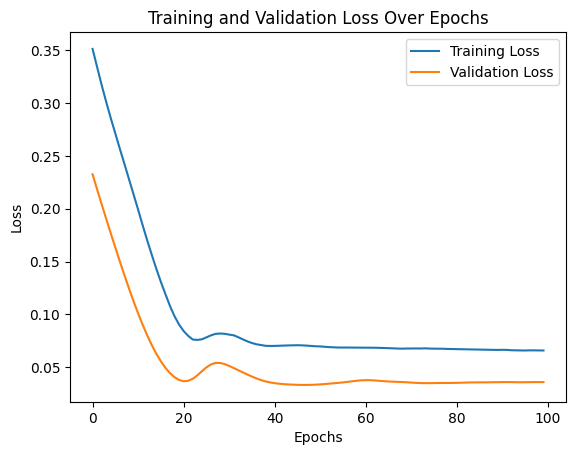

In [13]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

# Create an instance of the PINN model
model = PINN()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training configuration
num_epochs = 100
train_losses = []
val_losses = []

# Sample data for training and validation (replace these with actual data)
x_train = torch.rand(20, 1, requires_grad=True)  # 20 samples of x (position)
t_train = torch.rand(20, 1, requires_grad=True)  # 20 samples of t (time)
true_values_train = torch.rand(20, 4)  # Dummy true concentrations for training

x_val = torch.rand(5, 1, requires_grad=True)  # 5 samples of x for validation
t_val = torch.rand(5, 1, requires_grad=True)  # 5 samples of t for validation
true_values_val = torch.rand(5, 4)  # Dummy true concentrations for validation

# Training loop
for epoch in range(num_epochs):
    model.train()

    # Forward pass to get predictions
    predictions_train = model(x_train, t_train)

    # Compute the combined loss
    loss = combined_loss(predictions_train, true_values_train, x_train, t_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward(retain_graph=True)  # Retain graph to compute higher-order gradients
    optimizer.step()

    # Store training loss
    train_losses.append(loss.item())

    # Validation pass
    val_loss, _ = validate(model, x_val, t_val, true_values_val)
    val_losses.append(val_loss)

    # Print losses every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {loss.item():.6f}, Val Loss: {val_loss:.6f}')

# Plotting the training and validation loss
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.show()


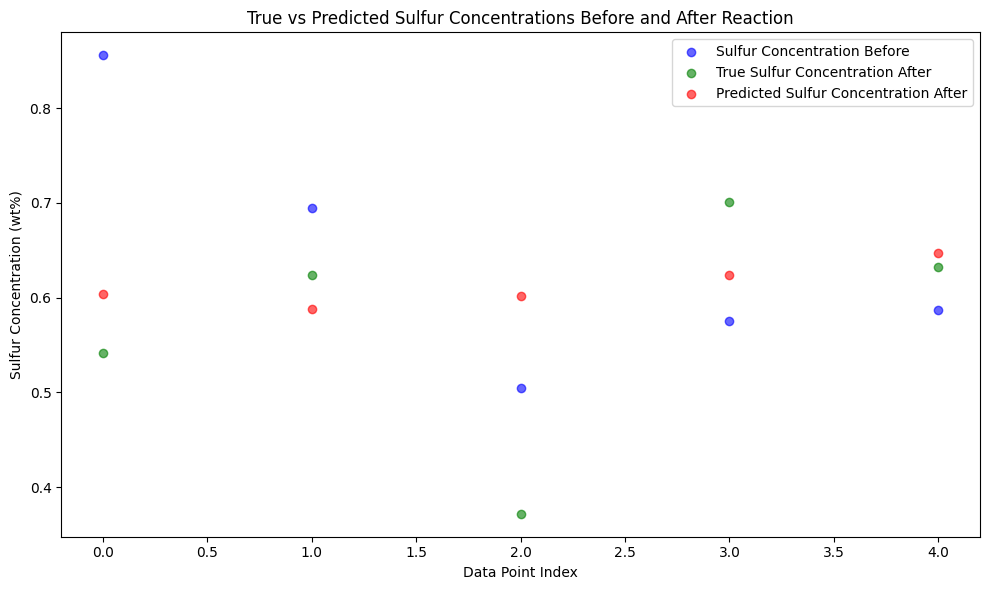

In [14]:
import matplotlib.pyplot as plt

# Set model to evaluation mode and disable gradient calculation
model.eval()
with torch.no_grad():
    # Generate predictions for the validation set
    predictions_val = model(x_val, t_val)

# Extract the sulfur concentrations from the validation dataset
true_sulfur_before = x_val.detach().numpy().flatten()  # Input sulfur concentration
true_sulfur_after = true_values_val[:, 0].detach().numpy().flatten()  # True output sulfur concentration (after)
predicted_sulfur_after = predictions_val[:, 0].detach().numpy().flatten()  # Predicted sulfur concentration (after)

# Plotting true vs predicted sulfur concentrations before and after the reaction
plt.figure(figsize=(10, 6))

# Scatter plot of true sulfur concentrations before and after the reaction
plt.scatter(range(len(true_sulfur_before)), true_sulfur_before, color='blue', label='Sulfur Concentration Before', alpha=0.6)
plt.scatter(range(len(true_sulfur_after)), true_sulfur_after, color='green', label='True Sulfur Concentration After', alpha=0.6)

# Scatter plot of predicted sulfur concentrations after the reaction
plt.scatter(range(len(predicted_sulfur_after)), predicted_sulfur_after, color='red', label='Predicted Sulfur Concentration After', alpha=0.6)

# Labels and Title
plt.xlabel('Data Point Index')
plt.ylabel('Sulfur Concentration (wt%)')
plt.title('True vs Predicted Sulfur Concentrations Before and After Reaction')
plt.legend()

plt.tight_layout()
plt.show()


Epoch [100/10000], Train Loss: 0.084448, Val Loss: 0.082360
Epoch [200/10000], Train Loss: 0.073654, Val Loss: 0.092912
Epoch [300/10000], Train Loss: 0.069433, Val Loss: 0.108366
Epoch [400/10000], Train Loss: 0.063979, Val Loss: 0.116721
Epoch [500/10000], Train Loss: 0.057611, Val Loss: 0.120418
Epoch [600/10000], Train Loss: 0.052817, Val Loss: 0.123923
Epoch [700/10000], Train Loss: 0.050517, Val Loss: 0.126095
Epoch [800/10000], Train Loss: 0.047272, Val Loss: 0.129775
Epoch [900/10000], Train Loss: 0.043804, Val Loss: 0.139117
Epoch [1000/10000], Train Loss: 0.041861, Val Loss: 0.149229
Epoch [1100/10000], Train Loss: 0.040654, Val Loss: 0.149893
Epoch [1200/10000], Train Loss: 0.039818, Val Loss: 0.152464
Epoch [1300/10000], Train Loss: 0.038054, Val Loss: 0.149932
Epoch [1400/10000], Train Loss: 0.036678, Val Loss: 0.149140
Epoch [1500/10000], Train Loss: 0.035347, Val Loss: 0.152699
Epoch [1600/10000], Train Loss: 0.033654, Val Loss: 0.156242
Epoch [1700/10000], Train Loss: 0

/var/folders/v4/jpplyq9d7vj4bb3_yglz32000000gn/T/ipykernel_92308/728799857.py:83: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(file)


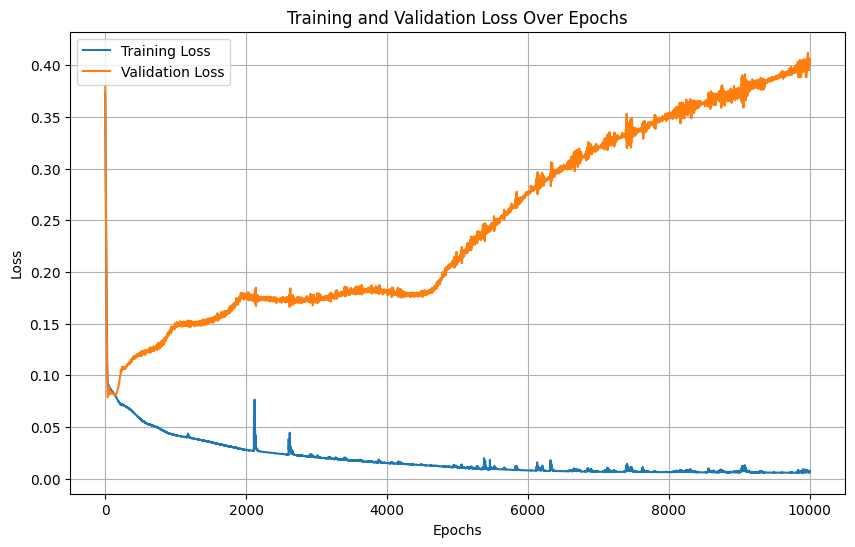

In [19]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import imageio

# Create an instance of the PINN model
model = PINN()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training configuration
num_epochs = 10000
train_losses = []
val_losses = []

# Sample data for training and validation (replace these with actual data)
x_train = torch.rand(20, 1, requires_grad=True)  # 20 samples of x (position)
t_train = torch.rand(20, 1, requires_grad=True)  # 20 samples of t (time)
true_values_train = torch.rand(20, 4)  # Dummy true concentrations for training

x_val = torch.rand(5, 1, requires_grad=True)  # 5 samples of x for validation
t_val = torch.rand(5, 1, requires_grad=True)  # 5 samples of t for validation
true_values_val = torch.rand(5, 4)  # Dummy true concentrations for validation

# File list for generating GIF
files = []

# Training loop
for epoch in range(num_epochs):
    model.train()

    # Forward pass to get predictions
    predictions_train = model(x_train, t_train)

    # Compute the combined loss
    loss = combined_loss(predictions_train, true_values_train, x_train, t_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward(retain_graph=True)  # Retain graph to compute higher-order gradients
    optimizer.step()

    # Store training loss
    train_losses.append(loss.item())

    # Validation pass
    val_loss, _ = validate(model, x_val, t_val, true_values_val)
    val_losses.append(val_loss)

    # Print losses every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {loss.item():.6f}, Val Loss: {val_loss:.6f}')

    # Visualize every 100 epochs
    if (epoch + 1) % 100 == 0:
        model.eval()  # Switch to evaluation mode
        with torch.no_grad():
            predictions_train_np = predictions_train.numpy()
            true_values_train_np = true_values_train.numpy()

            plt.figure(figsize=(14, 8))
            # Plot each component for predictions and true values
            labels = ['Sulfur', 'Hydrogen', 'Product', 'H2S']
            for i in range(4):
                plt.subplot(2, 2, i + 1)
                plt.scatter(x_train.numpy(), true_values_train_np[:, i], label=f'True {labels[i]}', color='blue', alpha=0.6)
                plt.plot(x_train.numpy(), predictions_train_np[:, i], label=f'Predicted {labels[i]}', color='red', linewidth=2)
                plt.xlabel('Position/Time')
                plt.ylabel(f'{labels[i]} Concentration')
                plt.legend()
                plt.title(f'{labels[i]} Concentration - Epoch {epoch + 1}')

            plt.tight_layout()
            file = f"plots/train_epoch_{epoch + 1:04d}.png"
            plt.savefig(file, bbox_inches='tight', pad_inches=0.1, dpi=100, facecolor="white")
            files.append(file)
            plt.close()

# Generate a GIF from the saved plots to visualize model training progression
with imageio.get_writer("training_progress.gif", mode="I", fps=2, loop=0) as writer:
    for file in files:
        image = imageio.imread(file)
        writer.append_data(image)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.grid(True)
plt.show()
